In [134]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from kneed import KneeLocator

## Task 1

# Downloading the Dataset

In [135]:
# Loading the iris dataset from sklearn datasets.
iris = load_iris(as_frame=True)
X = iris.data

Data Set Information:

This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

Predicted attribute: class of iris plant.

This is an exceedingly simple domain.

Attribute Information:

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
-- Iris Setosa
-- Iris Versicolour
-- Iris Virginica

# Data Exploration

In [136]:
# Number of Instances
X.shape[0]

150

In [137]:
# Number of attributes
X.shape[1]

4

In [138]:
# Statistical summary
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Data Preprocessing

In [139]:
# Checking for missing values
data.isnull().sum()

status_id           0
status_type         0
status_published    0
num_reactions       0
num_comments        0
num_shares          0
num_likes           0
num_loves           0
num_wows            0
num_hahas           0
num_sads            0
num_angrys          0
Column1             0
Column2             0
Column3             0
Column4             0
dtype: int64

No missing values in the dataset so i keep going.

# Appling clustering algorithms

In [140]:
# Apply clustering models using K-Means algorithm with 3 clusters
kmean = KMeans(n_clusters= 3 )
kmean.fit(X)

KMeans(n_clusters=3)

In [141]:
result = kmean.labels_
# get Mean Silhouette Coefficient for all samples.
silhouette_score(X , result)

0.5528190123564102

In [142]:
# try  Silhouette Score for different clusters.
score = []
for n in range(2,11):
    kmean = KMeans(n_clusters= n )
    kmean.fit(X)
    result = kmean.labels_
    print(n , '    '  , silhouette_score(X , result))
    score.append(silhouette_score(X , result))

2      0.6810461692117465
3      0.5528190123564102
4      0.49805050499728803
5      0.48874888709310654
6      0.36871053323330594
7      0.3426134247424028
8      0.3288575316460978
9      0.34102346846395454
10      0.3314060716780684


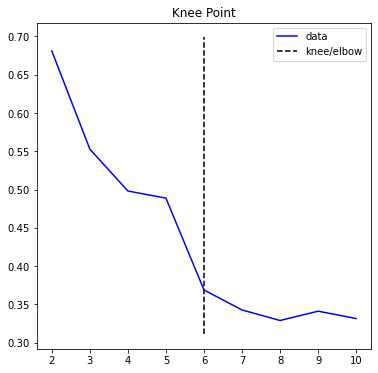

In [143]:
# using kneed to find the best k value.
kl = KneeLocator(range(2,11) , score, curve="convex", direction="decreasing")
kl.plot_knee()

from graph the best k = 6.

## Task 2

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn import metrics

# Downloading the Dataset

Dataset was downloaded from : https://archive.ics.uci.edu/ml/datasets/Facebook+Live+Sellers+in+Thailand

In [2]:
# Loading the covertype dataset
data = pd.read_csv('Live.csv')

In [3]:
data.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


Data Set Information:

The variability of consumer engagement is analysed through a Principal Component Analysis, highlighting the changes induced by the use of Facebook Live. The seasonal component is analysed through a study of the averages of the different engagement metrics for different time-frames (hourly, daily and monthly). Finally, we identify statistical outlier posts, that are qualitatively analyzed further, in terms of their selling approach and activities.


Attribute Information:

status_id
status_type
status_published
num_reactions
num_comments
num_shares
num_likes
num_loves
num_wows
num_hahas
num_sads
num_angrys

clustering task:

Facebook pages of 10 Thai fashion and cosmetics retail sellers. Posts of a different nature (video, photos, statuses, and links). Engagement metrics consist of comments, shares, and reactions.

# Data Exploration

In [4]:
# Number of Instances
data.shape[0]

7050

In [5]:
# Number of attributes
data.shape[1]

16

In [6]:
# Statistical summary
data.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,0.0,0.0,0.0,0.0
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191,NaN,NaN,NaN,NaN
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812,NaN,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000,NaN,NaN,NaN,NaN


# Data Preprocessing

In [7]:
# Checking for missing values
data.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [8]:
data.shape

(7050, 16)

In [9]:
# isolate features and labels 
x = data.loc[ : ,"num_reactions":"num_angrys"]
y = data["status_type"]

In [10]:
le = preprocessing.LabelEncoder()
# Fit label encoder and return encoded labels
labels_true=le.fit_transform(y)

In [11]:
labels_true

array([3, 1, 3, ..., 1, 1, 1])

# Appling clustering algorithms

### Hierarchical clustering

In [15]:
clustering = AgglomerativeClustering(n_clusters=4)
clustering.fit(x)
Hierlabels = clustering.labels_

In [16]:
silhouette_score(x, clustering.fit_predict(x))

0.7924439246095623

### Density based clustering

In [17]:
DBSCANModel = DBSCAN(metric='euclidean',eps=0.5,min_samples=10,algorithm='auto')
DBSCANModel.fit(x)
DBSClabels=DBSCANModel.labels_

In [18]:
silhouette_score(x, DBSCANModel.fit_predict(x))

-0.3142794527182362

Evaluation Hierarchical clustering

In [186]:
clusters = len(set(Hierlabels)) 
print( 'number of clusters  = ',  clusters)
print('Homogeniece  = ' , metrics.homogeneity_score(labels_true , Hierlabels ))
print('complteness is ' , metrics.completeness_score(labels_true , Hierlabels))
print('v measure = ' , metrics.v_measure_score(labels_true , Hierlabels))

number of clusters  =  4
Homogeniece  =  0.08841193498729184
complteness is  0.1488974648898307
v measure =  0.11094640998147302


Evaluation Density based clustering

In [185]:
clusters = len(set(DBSClabels)) 
print( 'number of clusters  = ',  clusters)
print('Homogeniece  = ' , metrics.homogeneity_score(labels_true , DBSClabels ))
print('complteness is ' , metrics.completeness_score(labels_true , DBSClabels))
print('v measure = ' , metrics.v_measure_score(labels_true , DBSClabels))

number of clusters  =  38
Homogeniece  =  0.04444982616361308
complteness is  0.034034924313706104
v measure =  0.03855134812903948
